Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("avocado.csv")

In [4]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [8]:
df.min()

Unnamed: 0                 0
Date              2015-01-04
AveragePrice            0.44
Total Volume           84.56
4046                     0.0
4225                     0.0
4770                     0.0
Total Bags               0.0
Small Bags               0.0
Large Bags               0.0
XLarge Bags              0.0
type            conventional
year                    2015
region                Albany
dtype: object

In [9]:
df.mean()

Unnamed: 0          24.232232
AveragePrice         1.405978
Total Volume    850644.013009
4046            293008.424531
4225            295154.568356
4770             22839.735993
Total Bags      239639.202060
Small Bags      182194.686696
Large Bags       54338.088145
XLarge Bags       3106.426507
year              2016.147899
dtype: float64

In [10]:
df.max()

Unnamed: 0                    52
Date                  2018-03-25
AveragePrice                3.25
Total Volume         62505646.52
4046                 22743616.17
4225                 20470572.61
4770                  2546439.11
Total Bags           19373134.37
Small Bags            13384586.8
Large Bags            5719096.61
XLarge Bags            551693.65
type                     organic
year                        2018
region          WestTexNewMexico
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [13]:
#EDA
#Checking Total Numbers of Rows and Column
df.shape

(18249, 14)

In [14]:
#Checking All Column Names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [15]:
#Checking Data Type of All Data

df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [16]:
#Checking for Null Values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

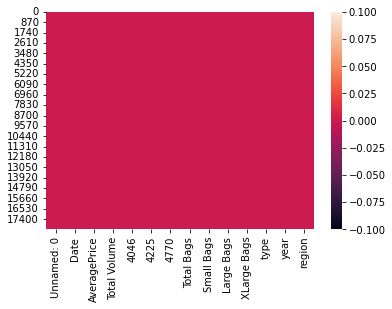

In [17]:
#There is no null value present in our dataset

# Checking for Null Values through heatmap also
sns.heatmap(df.isnull())

In [18]:
# We can check through visualization also that there is no Null Value present in our Dataset.

In [19]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [20]:
# Checking for blank value in our Target Column
df[df['AveragePrice'] == ''].index

Int64Index([], dtype='int64')

In [21]:
#So, we can check there are no blank value present in our Target Column

In [22]:
# Checking whether the dataset contains any space
df[df['AveragePrice'] == '']

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [23]:
# So we can see there are no spaces present in the dataset.

In [24]:
# Checking unique values present in the Target Variable.
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [25]:
df['AveragePrice'].nunique()

259

In [26]:
# Checking unique elements in each columns
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [27]:
# Total Values in the target variable
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [28]:
#Data Cleaning and preprocessing
#Dropping irrelevant column
#First column is 'Unnamed: 0' and this column have no any relation with our Target Column. So, we will drop this column.
df=df.drop(columns="Unnamed: 0", axis=1)

In [29]:
#Column 'Date' have no any relation with our Target Column. So, we will drop this column.
df=df.drop(columns="Date", axis=1)

In [30]:
# checking columns again after dropping
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [31]:
# Descriptive Statistics
# Description of Dataset : works only on continuous column 
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

So, we can see that 10 columns are continuous column: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year'
and 2 columns are categorical column: 'type', 'region'

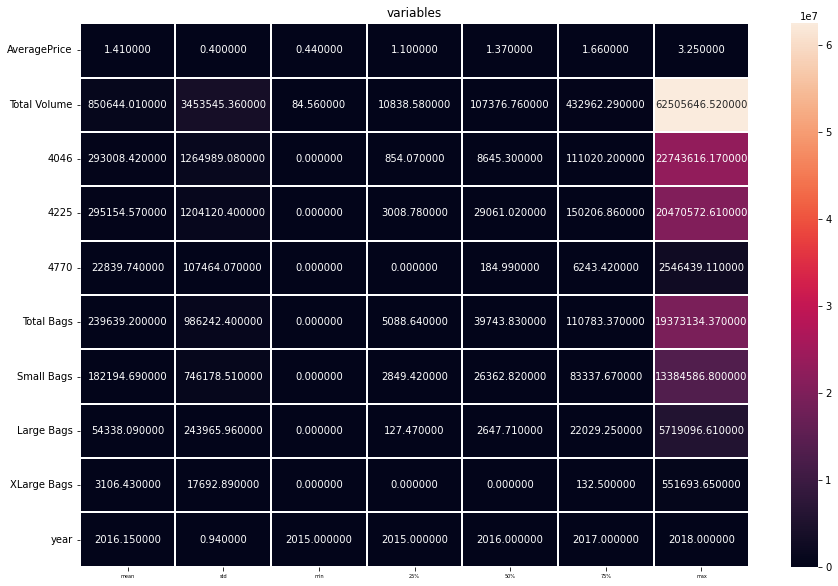

In [35]:
# Checking Description through heatmap also.
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=10)
plt.xticks(fontsize=5)
plt.title('variables')
plt.show()

Observation of Describe of Datasets:
The summary of this dataset looks good as there are no negative/ invalid value present.
We can see the counts of all the columns are 18249.000000 which means no null values are present.
Total No of Rows: 18249 and Total No. of Columns: 14
We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.
AveragePrice:
Mean= 1.405978,
std= 0.402677,
Min= 0.440000,
Max= 3.250000
Total Volume:
Mean= 8.506440e+05,
std= 3.453545e+06,
Min= 8.456000e+01,
Max= 6.250565e+07
4046:
Mean= 2.930084e+05,
std= 1.264989e+06,
Min= 0.000000e+00,
Max= 2.274362e+07
4225:
Mean= 2.951546e+05,
std= 1.204120e+06,
Min= 0.000000e+00,
Max= 2.047057e+07
4770:
Mean= 2.283974e+04,
std= 1.074641e+05,
Min= 0.000000e+00,
Max= 2.546439e+06
Total Bags:
Mean= 2.396392e+05,
std= 9.862424e+05,
Min= 0.000000e+00,
Max= 1.937313e+07
Small Bags:
Mean= 1.821947e+05,
std= 7.461785e+05,
Min= 0.000000e+00,
Max= 1.338459e+07
Large Bags:
Mean= 5.433809e+04,
std= 2.439660e+05,
Min= 0.000000e+00,
Max= 5.719097e+06
XLarge Bags:
Mean= 3106.426507,
std= 17692.894652,
Min= 0.000000,
Max= 551693.650000
year:
Mean= 2016.147899,
std= 0.939938,
Min= 2015.000000,
Max= 2018.000000
We can observe that the dataset seems to be having more outliers as well as skewness in the data on the basis of Quantile median result.

In [36]:
#Data Visualization
#Univariate Analysis
#Using Countplot

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

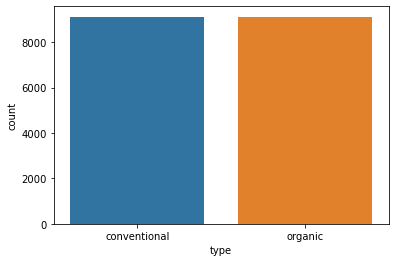

In [37]:
#Countplot for "type" column
print(df['type'].value_counts())
sns.countplot('type',data=df)

In [38]:
#  We can see that the total number of conventional avacado sold is 9126 and the total number of organic avacado sold is 9123.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

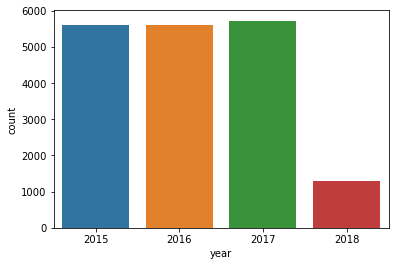

In [39]:
#Countplot for "year" column
print(df['year'].value_counts())
sns.countplot('year',data=df)

We can see that:

In the year 2017, the total number of avocado sold was 5722.
In the year 2016, the total number of avocado sold was 5616
In the year 2015, the total number of avocado sold was 5615
In the year 2018, the total number of avocado sold was 1296

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:xlabel='count', ylabel='region'>

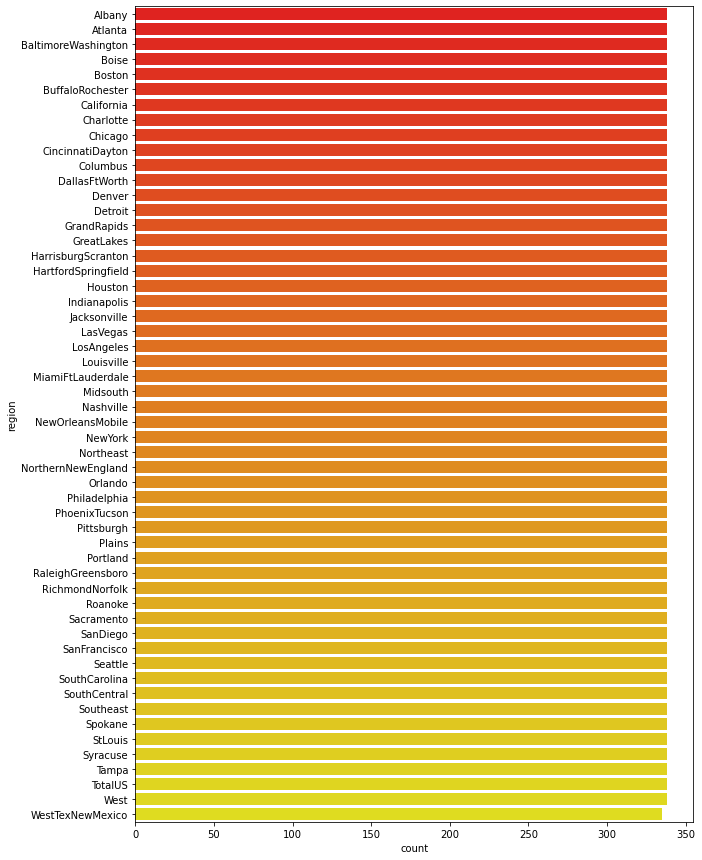

In [40]:
#Countplot for "region" column
print(df['region'].value_counts())
plt.figure(figsize=(10,15))
sns.countplot(y='region', data=df, palette='autumn')

In [41]:
#  All "Region" have 338 observation and only "WestTexNewMexico" have 335 observation

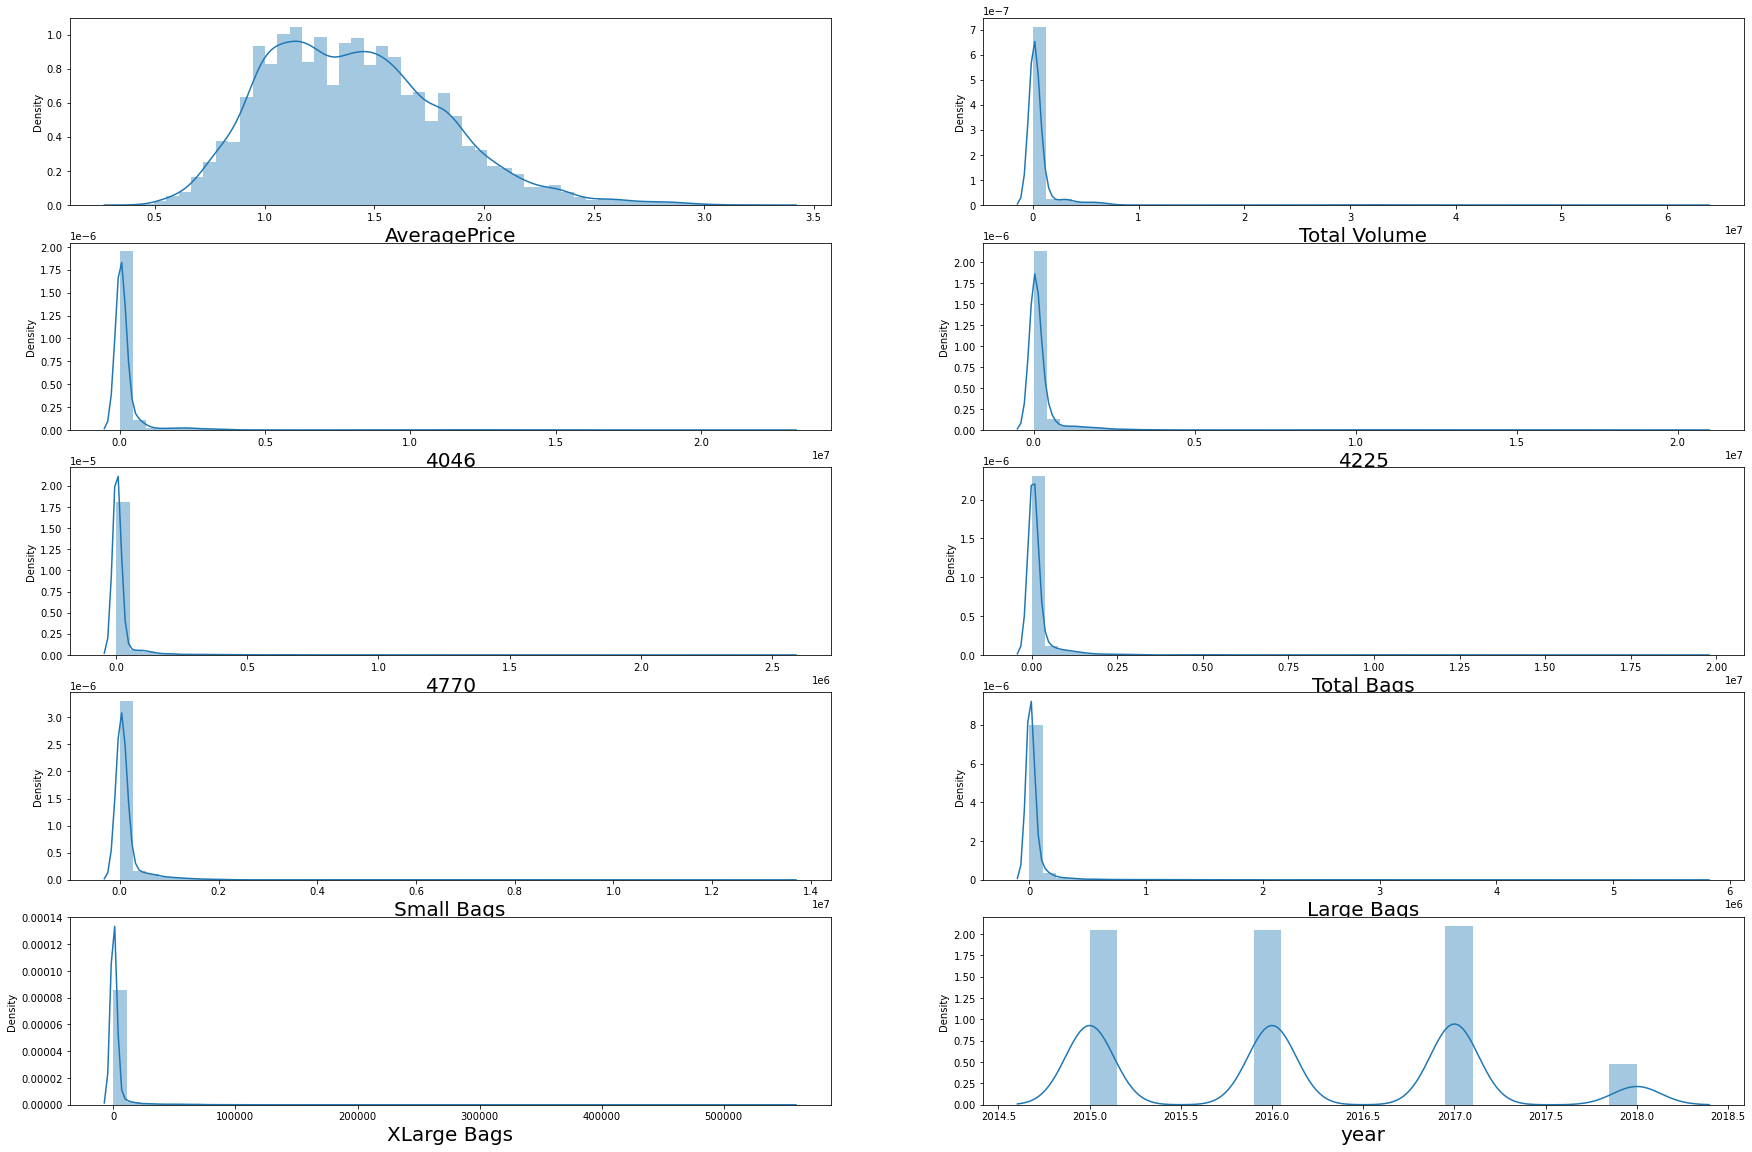

In [42]:
collist=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']
plt.figure(figsize=(30,20))
plotnumber = 1

for column in df[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [43]:
#  We can see there are skewness present in all continuous columns and data is not normalised

In [44]:
#Bivariate Analysis
#Using Scatterplot

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

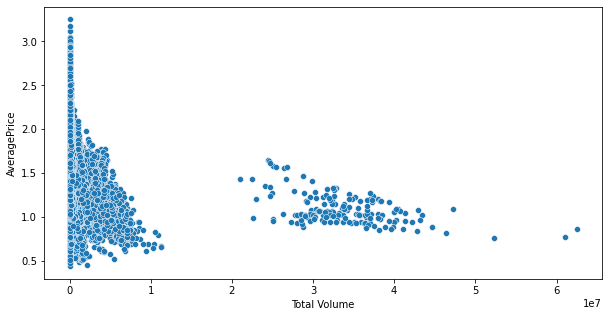

In [45]:
#Scatterplot for comparision between "Total Volume" and "AveragePrice" column
print(df['Total Volume'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=df)

In [46]:
#  "Total Volume" 4103.97 have 2 Average price and "Total Volume" 17489.58 have 1 Average price

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

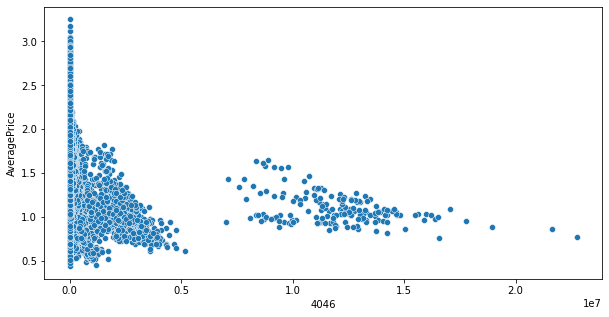

In [47]:
#Scatterplot for comparision between "4046" and "AveragePrice" column
print(df['4046'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4046', y='AveragePrice', data=df)

In [48]:
#  "4046" 0.00 have 242 Average Price and "4046" 2894.77 have 1 Average Price

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

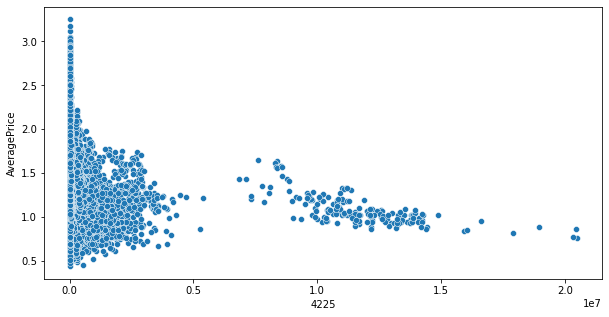

In [49]:
#Scatterplot for comparision between "4225" and "AveragePrice" column
print(df['4225'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4225', y='AveragePrice', data=df)

In [50]:
#  "4225" 0.00 have 61 Average Price and "4225 2356.13 have 1 Average Price

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64


<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

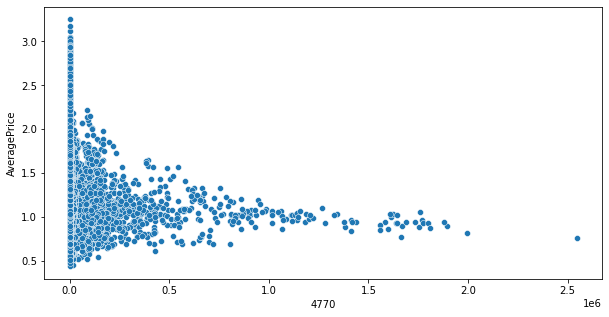

In [51]:
#Scatterplot for comparision between "4770" and "AveragePrice" column
print(df['4770'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='4770', y='AveragePrice', data=df)

In [52]:
#  "4770" 0.00 have 5497 Average Price and "4770" 224.53 have 1 Average Price

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64


<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

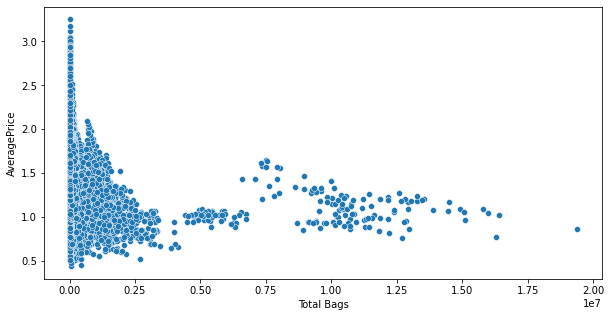

In [53]:
#Scatterplot for comparision between "Total Bags" and "AveragePrice" column
print(df['Total Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Bags', y='AveragePrice', data=df)

In [54]:
#  "Total Bags" 0.00 have 15 Average Price and "Total Bags" 12014.15 have 1 Average Price

0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: Small Bags, Length: 17321, dtype: int64


<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

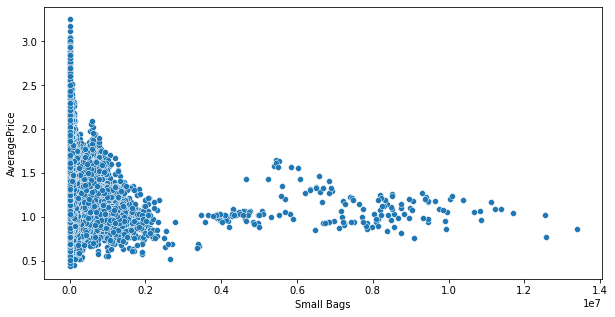

In [55]:
#Scatterplot for comparision between "Small Bags" and "AveragePrice" column
print(df['Small Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Small Bags', y='AveragePrice', data=df)

In [56]:
# "Small Bags" 0.00 have 159 Average Price and "Small Bags" 11988.14 have 1 Average Price

0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64


<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

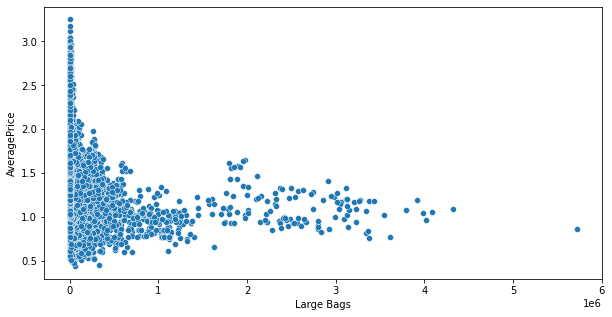

In [57]:
#Scatterplot for comparision between "Large Bags" and "AveragePrice" column
print(df['Large Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='Large Bags', y='AveragePrice', data=df)

In [58]:
#  "Large Bags" 0.00 have 2370 Average Price and "Large Bags" 26.01 have 1 Average Price

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64


<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

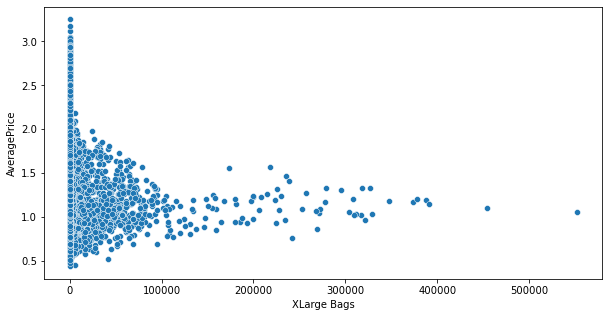

In [59]:
#Scatterplot for comparision between "XLarge Bags" and "AveragePrice" column
print(df['XLarge Bags'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='XLarge Bags', y='AveragePrice', data=df)

In [60]:
#  "XLarge Bags" 0.00 have 12048 Average Price and "XLarge Bags" 24.18 have 1 Average Price

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

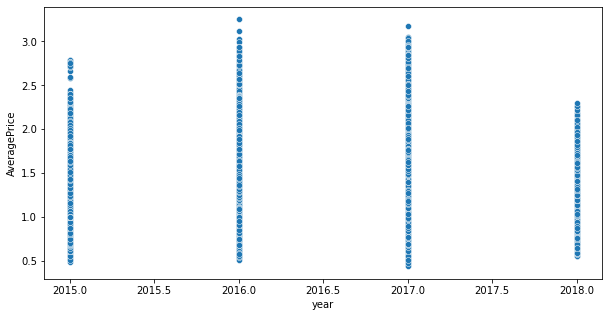

In [61]:
#Scatterplot for comparision between "year" and "AveragePrice" column
print(df['year'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x='year', y='AveragePrice', data=df)

In [62]:
#  Average price in 2017 is high as 5722 Avacado sold in year 2017 and Average price in 2018 is low as 1296 Avacado sold in year 2018

In [63]:
# Using Barplot for comparision

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

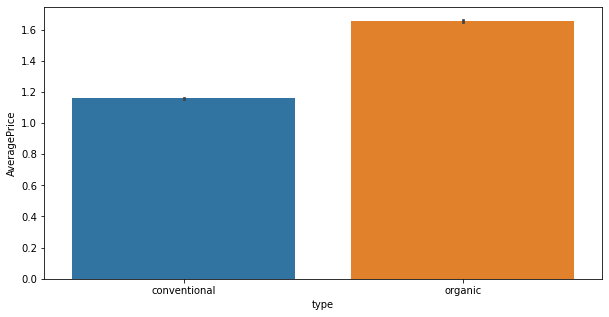

In [64]:
#Barplot for comparision between "type" and "AveragePrice" column
plt.figure(figsize=(10,5))
sns.barplot(x='type', y='AveragePrice', data=df)

In [65]:
#  Average Price of Organic type Avacado is higher than conventional type Avacado

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

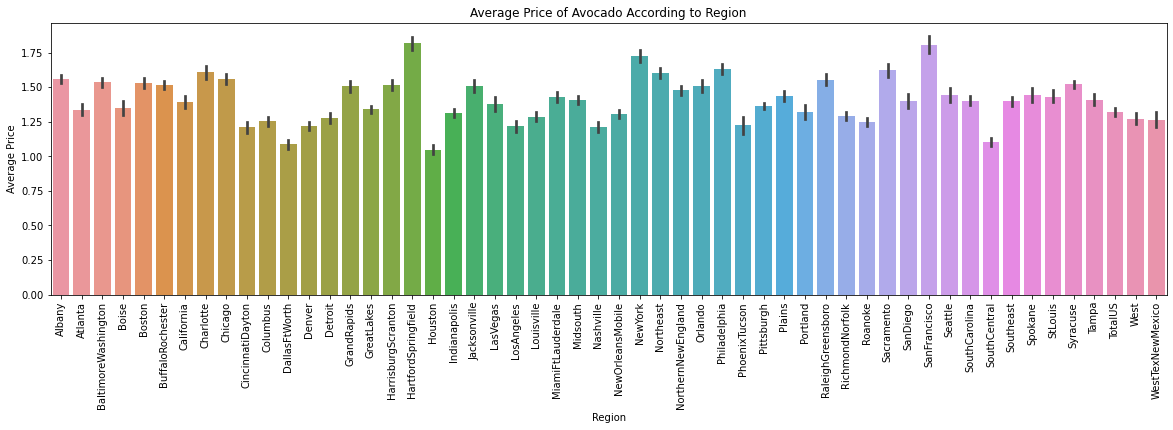

In [67]:
#Barplot for comparision between "region" and "AveragePrice" column
plt.figure(figsize=(20,5))
sns.barplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

The region where Average price is very high is:- HartfordSpringfield and Top five region where Average price is very high are:
SanFrancisco
HartfordSpringfield
NewYork
Philadelphia
Sacramento
The region where Average price is very low is:- Houston and Top five region where Average price is very low are:
Houston
SouthCentral
DallasFtWorth
CincinnatiDayton
PhoenixTucson

Text(0.5, 1.0, 'Total Volume of Avocado According to Region')

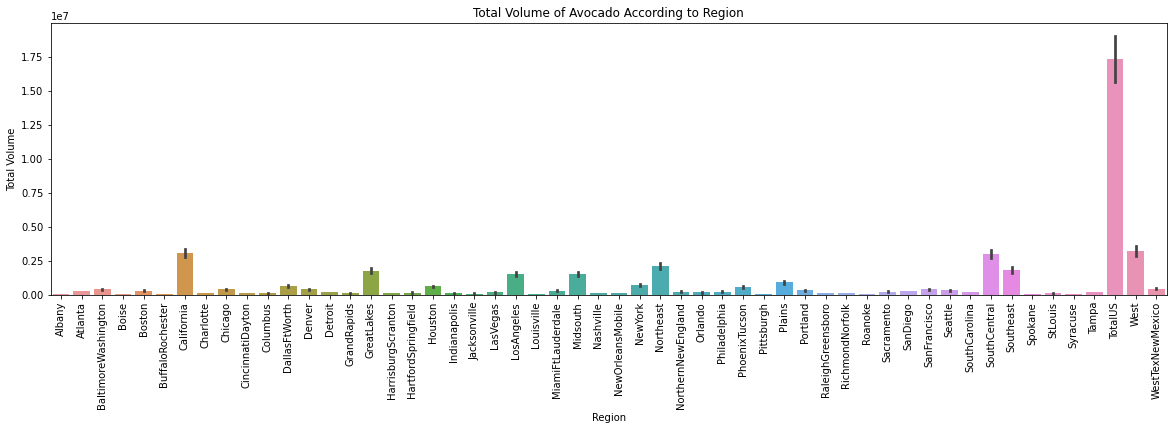

In [68]:
#Barplot for comparision between "region" and "Total Volume" column
plt.figure(figsize=(20,5))
sns.barplot(x='region', y='Total Volume', data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado According to Region')

In [69]:
# the region where Total Volume is very high is:- TotalUS and the region whereTotal Volume is very low is:- Syracuse

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

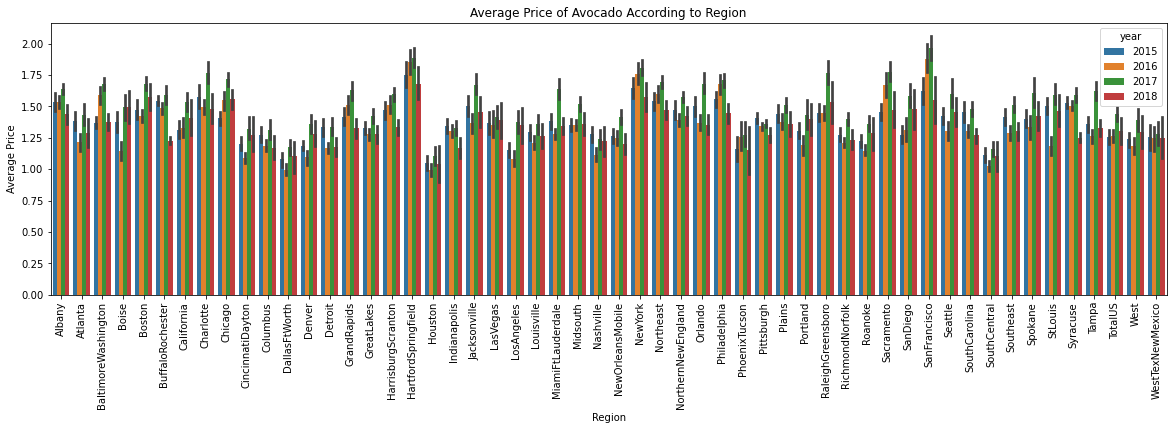

In [70]:
# The year and region for which the Average price the highest
plt.figure(figsize=(20,5))
sns.barplot(y='AveragePrice',x='region',data=df, hue='year')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [71]:
#  "Average Price" of Avocado According to "Region" SanFrancisco in year 2017 is highest and lowest in "Region" Houston in year 2016.

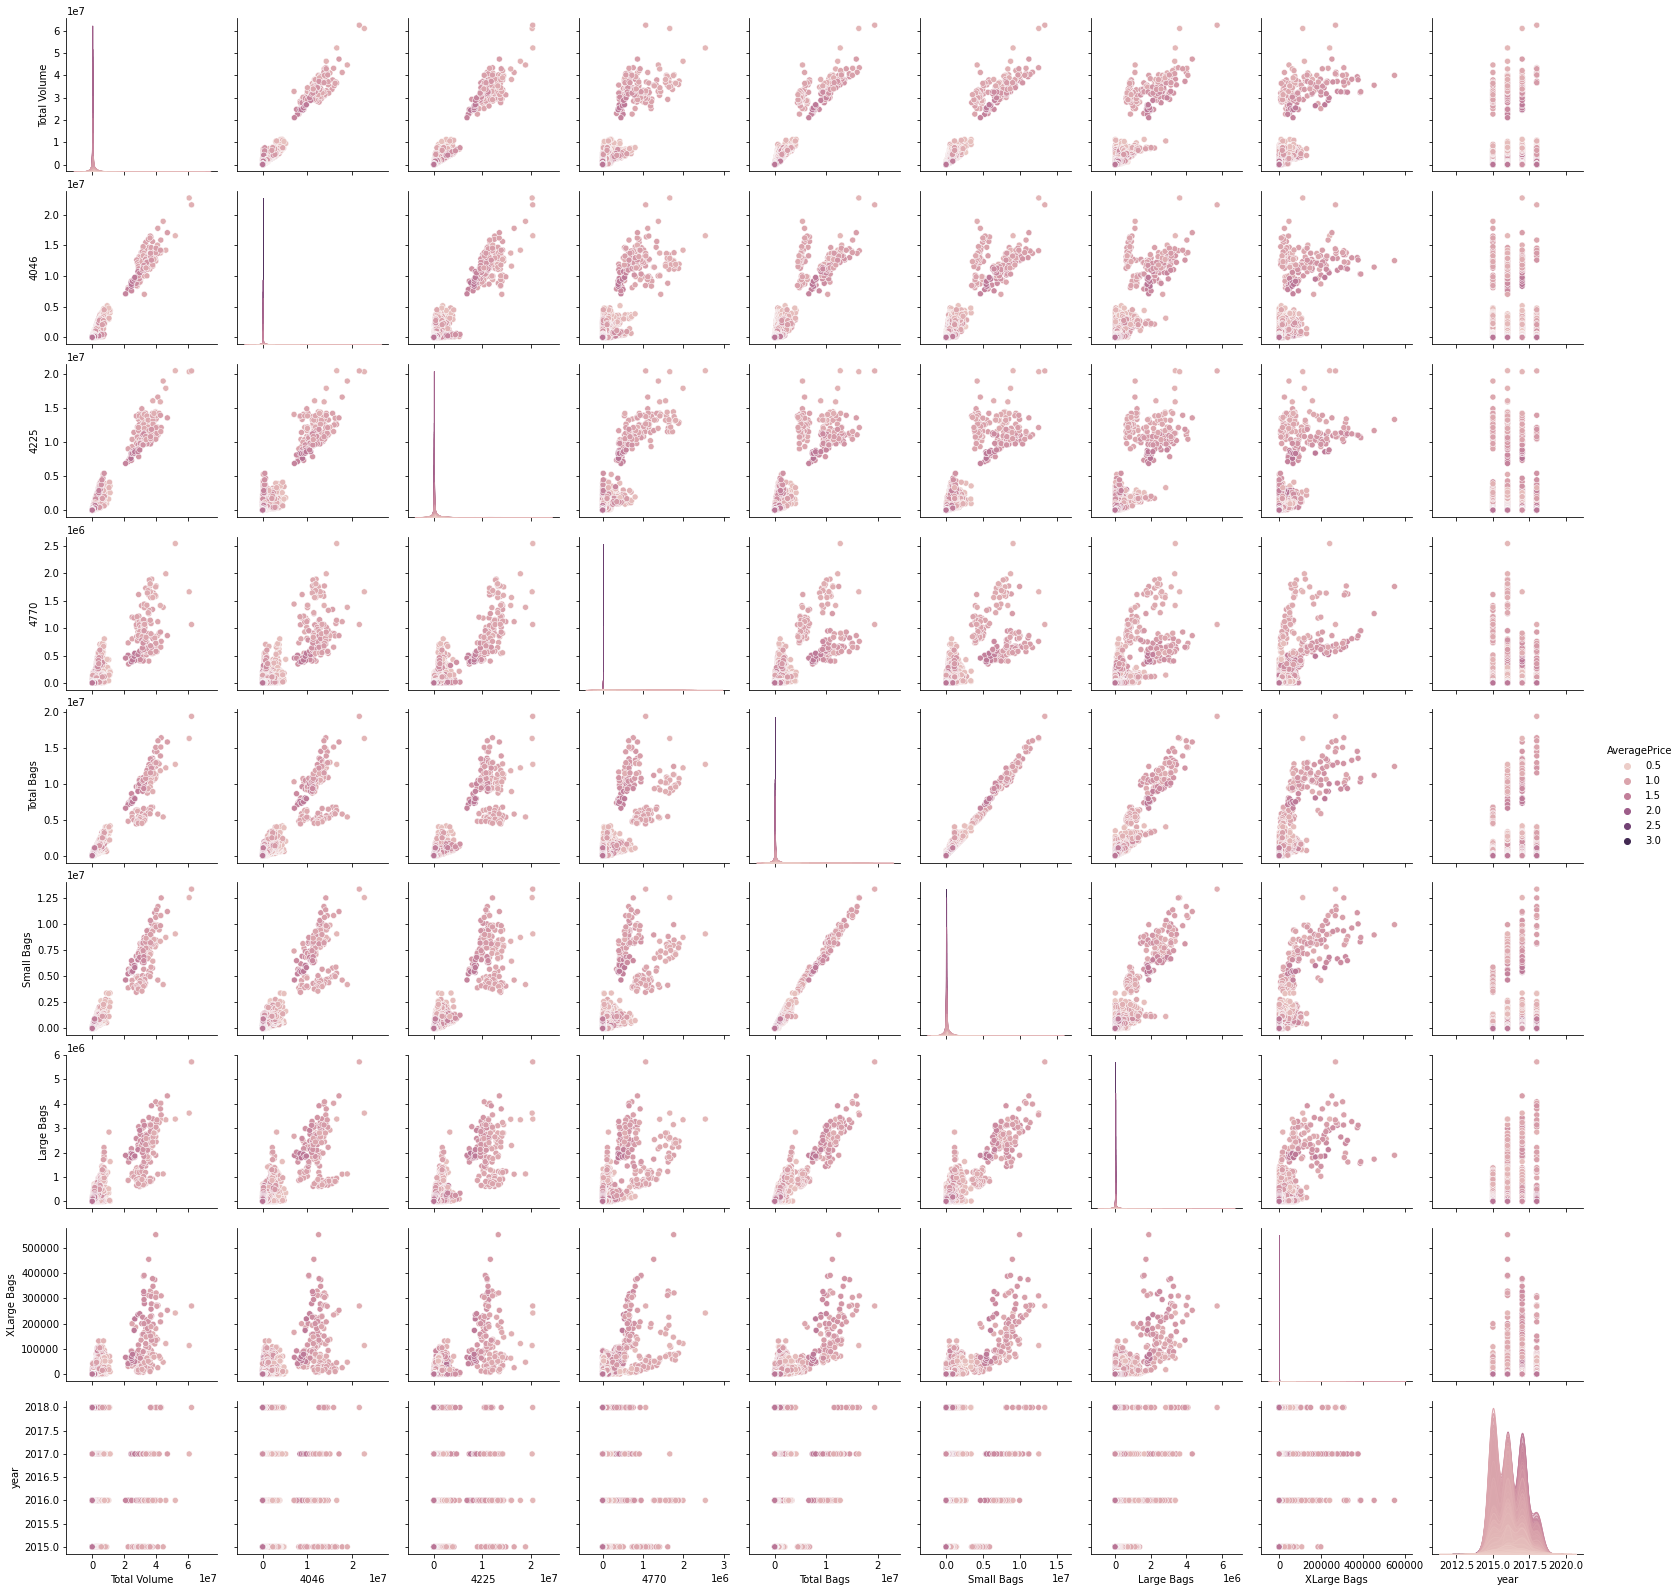

In [72]:
#Multivariate Analysis
# Using pairplot
sns.pairplot(data=df,hue="AveragePrice")

In [73]:
#  This pair plot gives the relation between the columns which are plotted on the basis of target variable 'Average Price'.

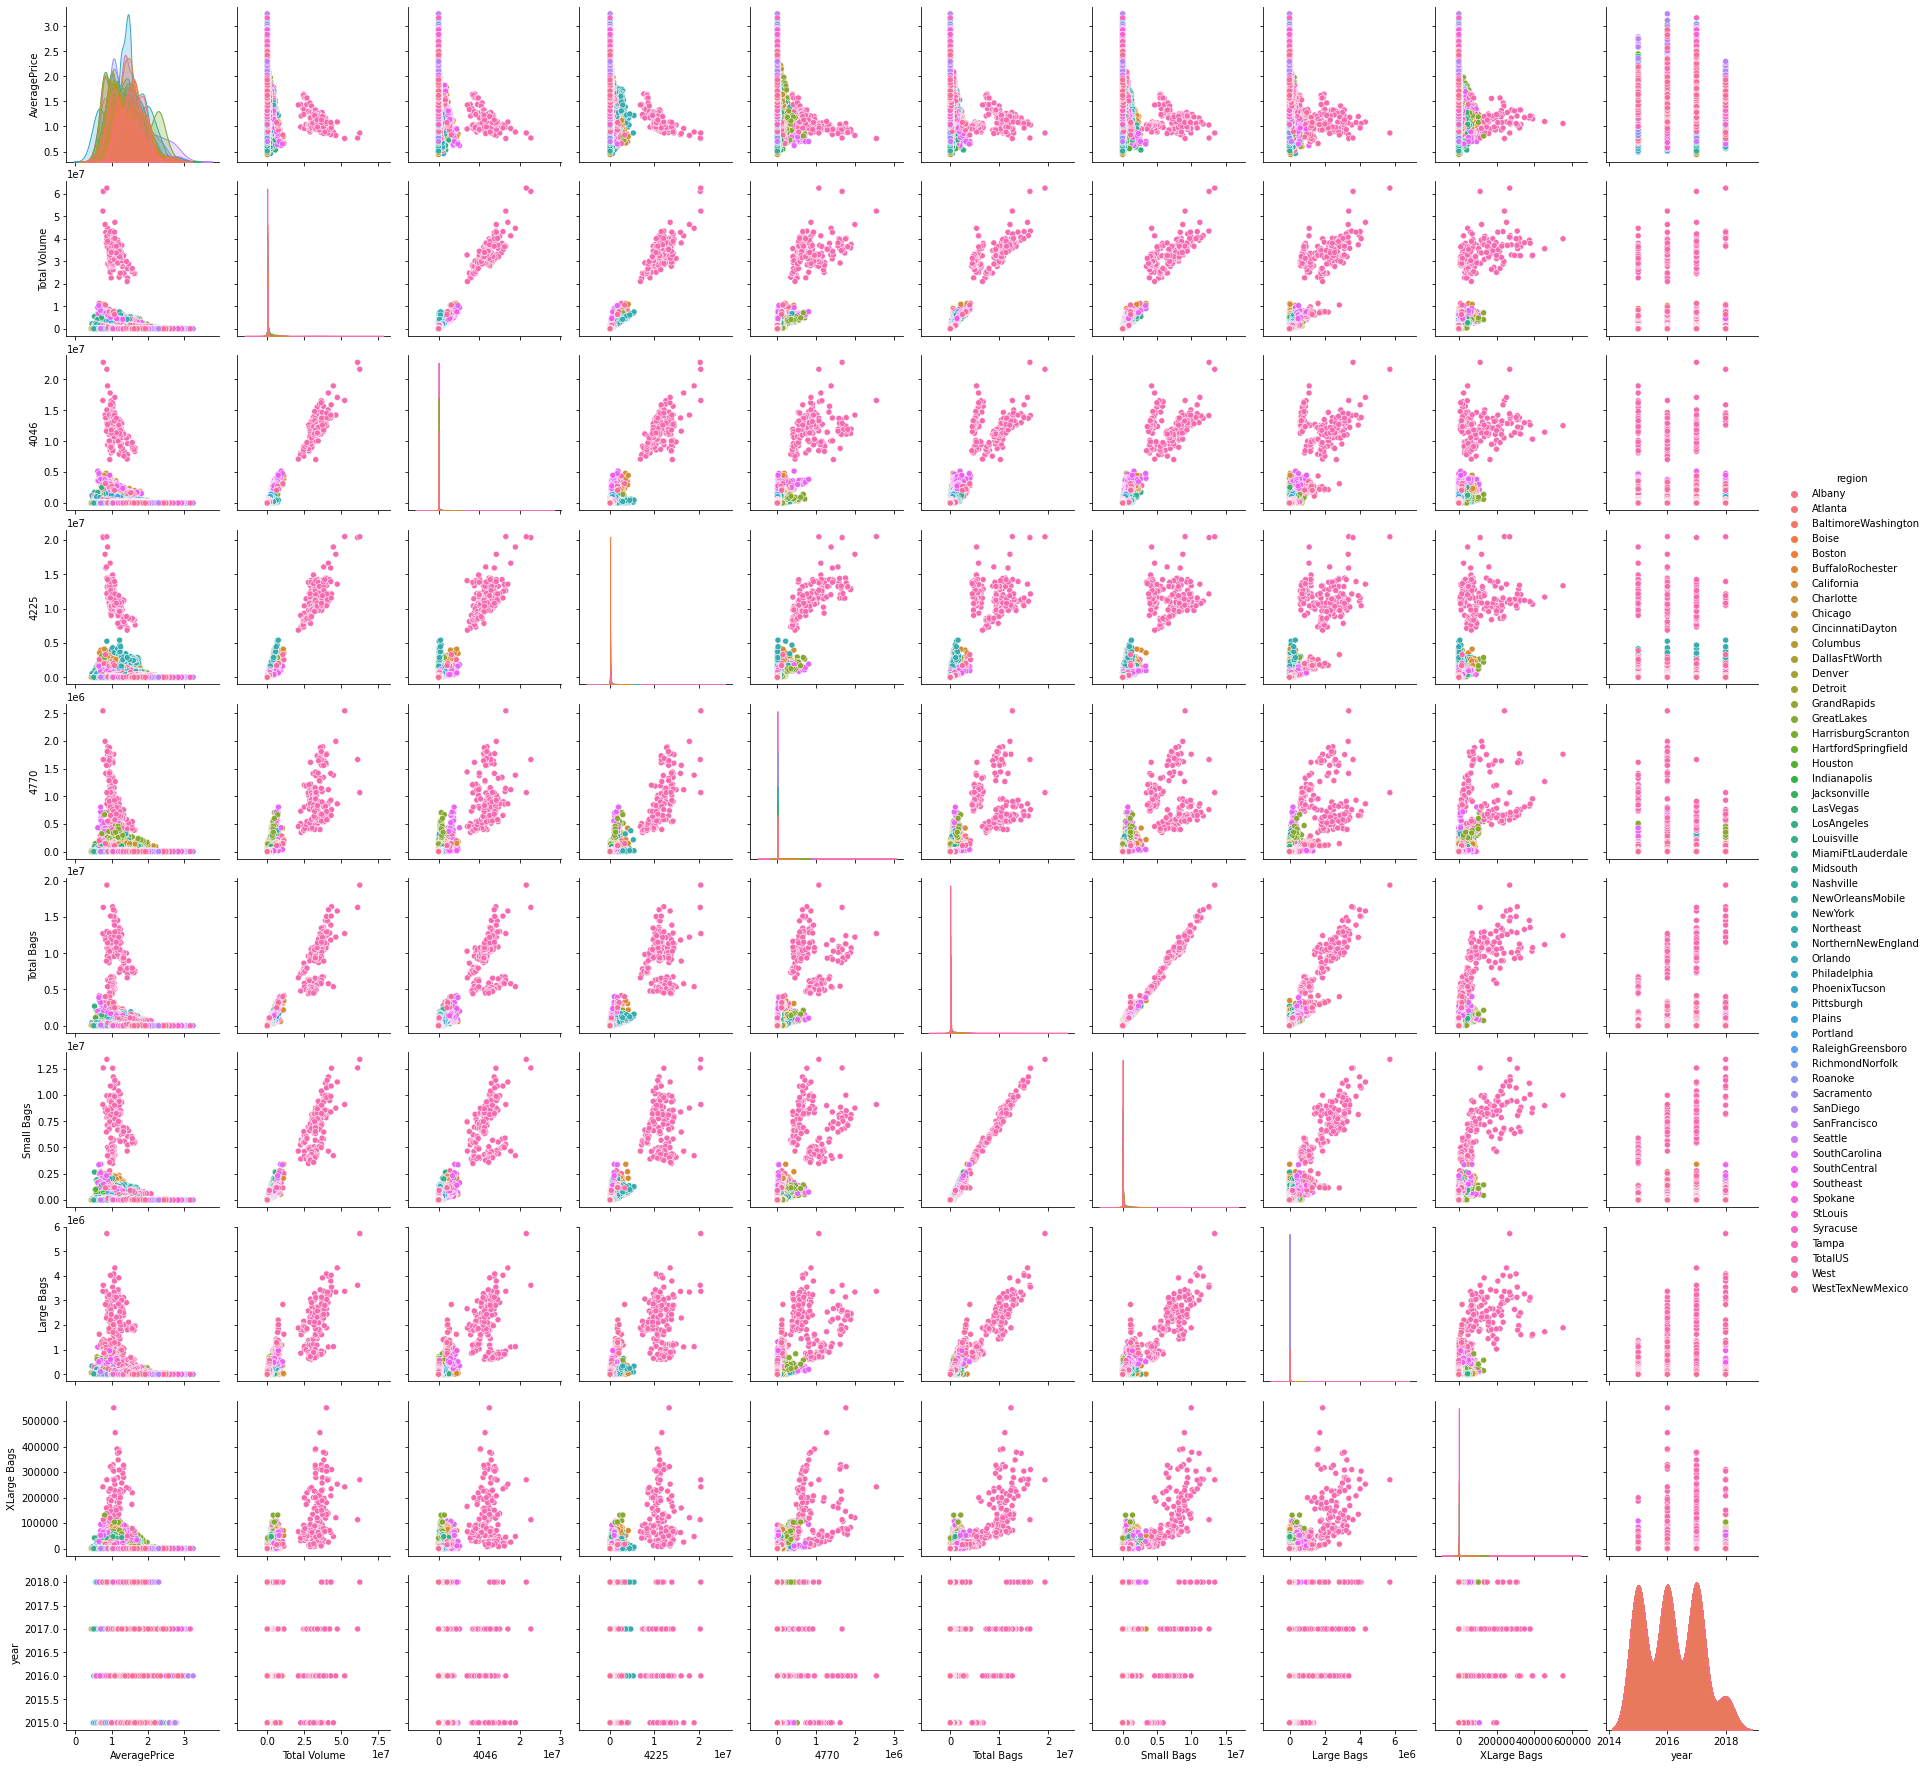

In [74]:
sns.pairplot(data=df,hue="region")

In [75]:
# This pair plot gives the relation between the columns which are plotted on the basis of column 'region'.

In [76]:
#Checking Correlation
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

In [77]:
#This gives the correlation between the denpendent and independent variables.

In [78]:
df.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [79]:
#We can observe least correlation is with column "4046" and strong correlation is with column "year". 
#All columns are negatively correlated except "year" column which is positively correlated.

<AxesSubplot:>

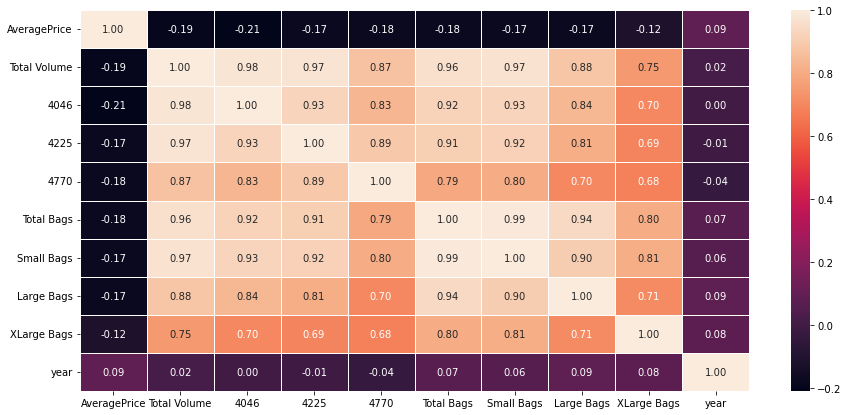

In [80]:
# checking correlation with heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

Outcome of Correlation
'Total Volume' has -19 percent correlation with the target column which can be considered as good correlation and positively correlated.

'4046' has -21 percent correlation with the target column which can be considered as weak correlation and negatively correlated.

'4225' has -17 percent correlation with the target column which can be considered as good correlation and negatively correlated.

'4770' has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.

'Total Bags' has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.

'Small Bags' has -17 percent correlation with the target column which can be considered as good correlation and negatively correlated.

'Large Bags' has -17 percent correlation with the target column which can be considered as good correlation and negatively correlated.

'XLarge Bags' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.

'year' has 9 percent correlation with the target column which can be considered as strong correlation and positively correlated.

Max Correlation: year

Min Correlation: 4046

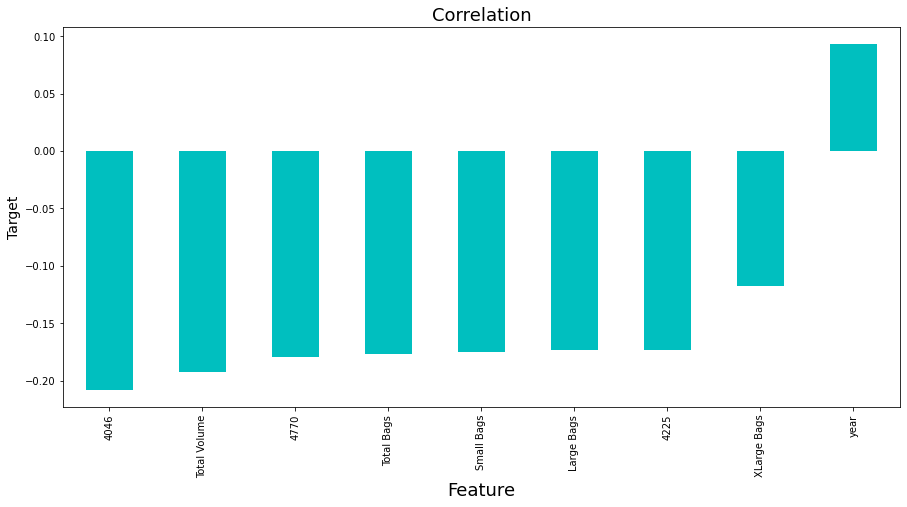

In [81]:
# Checking correlation with barplot
plt.figure(figsize=(15,7))
df.corr()['AveragePrice'].sort_values(ascending=True).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Observation of the correlation:
Positively correlated with : year

Negatively correlated with : '4046', 'Total Volume', '4770', 'Total Bags', 'Small Bags', 'Large Bags', '4225' and 'XLarge Bags'

In heatmap we also observed that the '4046' column has least correlation with the target variable.

In [82]:
# Label Encoding
encoder=LabelEncoder()

In [83]:
df["type"] = encoder.fit_transform(df[["type"]])
df["region"] =encoder.fit_transform(df[["region"]])

In [84]:
df["type"].unique()

array([0, 1])

In [85]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [87]:
# Checking dataset after transformation
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0  
2     8042.21      103.14          0.0     0  2015       0  
3     5677.40      133.76          0.0     0  2015       0  
4     5986.26      197.69          0.0     0  2015       0

In [88]:
df.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [89]:
df.corr()["region"].sort_values()

AveragePrice   -0.011716
type           -0.000280
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

In [90]:
#Checking Outliers
df.shape

(18249, 12)

In [91]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

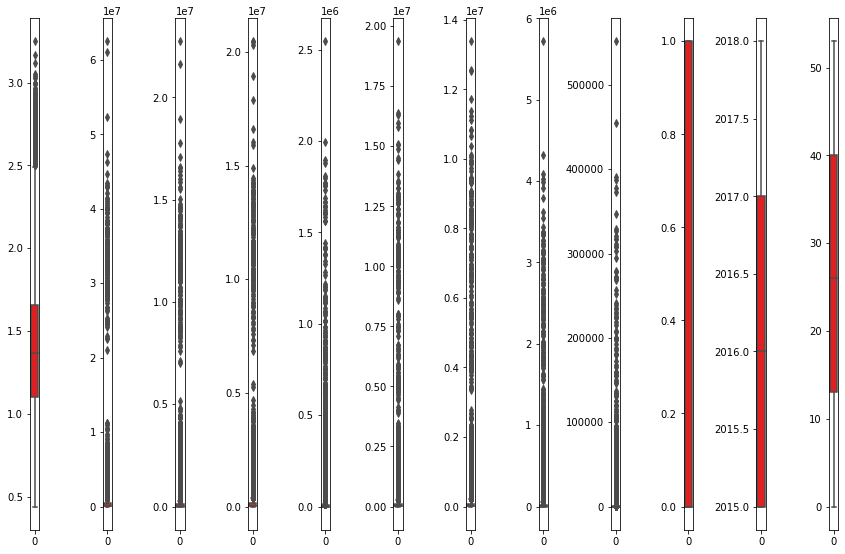

In [92]:
collist=df.columns.values
ncol=30
nrows=12
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='red',orient='v')
    plt.tight_layout()

### Observation:
    
- Outliers are present in all continuous columns: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.

- But we will not remove Outliers from 'AveragePrice'  column as it is Target column.

-  Outliers not present in all categorical columns: 'type', 'year' and 'region'.

In [93]:
#Removing Outliers
# 1. Zscore method using Scipy for Target Column "Average Price"
#  Outliers will be removed only from Continuous column variable: 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.. 
# We will not remove outliers from Categorical column i.e; 'type', 'year' & 'region' and from Target column i.e; AveragePrice.
variable = df[[ 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]
z=np.abs(zscore(variable))
# Creating new dataframe for regression
df1 = df[(z<3).all(axis=1)]
df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0  
2     8042.21      103.14          0.0     0  2015       0  
3     5677.40      133.76          0.0     0  2015       0  
4     5986.26      197.69          0.0     0  2015       0

In [94]:
z.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1      0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2      0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3      0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4      0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   

   Large Bags  XLarge Bags  
0    0.222352      0.17558  
1    0.222335      0.17558  
2    0.222311      0.17558  
3    0.222186      0.17558  
4    0.221924      0.17558

In [95]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df1.shape)
print("Total Dropped rows:",df.shape[0]-df1.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)
New DataFrame data in Rows and Column: (17782, 12)
Total Dropped rows: 467


In [96]:
# Percentage Data Loss using Zscore
loss_percent=(18249-17782)/18249*100
print(loss_percent,"%")

2.55904433119623 %


In [97]:
# 1.1 Zscore method using Scipy for Target Column "region"
#  Outliers will be removed only from Continuous column variable: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'.. 
# We will not remove outliers from Categorical column i.e; 'type', 'year' & 'region' 
variable1 = df[[ 'AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']]
z1=np.abs(zscore(variable))
# Creating new dataframe for classification
df_study = df[(z1<3).all(axis=1)]
df_study.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0  
2     8042.21      103.14          0.0     0  2015       0  
3     5677.40      133.76          0.0     0  2015       0  
4     5986.26      197.69          0.0     0  2015       0

In [98]:
z1.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1      0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2      0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3      0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4      0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   

   Large Bags  XLarge Bags  
0    0.222352      0.17558  
1    0.222335      0.17558  
2    0.222311      0.17558  
3    0.222186      0.17558  
4    0.221924      0.17558

In [99]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_study.shape)
print("Total Dropped rows:",df.shape[0]-df_study.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)
New DataFrame data in Rows and Column: (17782, 12)
Total Dropped rows: 467


In [100]:
# Percentage Data Loss using Zscore
loss_percent=(18249-17782)/18249*100
print(loss_percent,"%")

2.55904433119623 %


In [101]:
#2. IQR (Inter Quantile Range) method for Target Column "Average Price"
#1st quantile
Q1=variable.quantile(0.25)
# 3rd quantile
Q3=variable.quantile(0.75)
#IQR
IQR=Q3 - Q1
df2=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [102]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df2.shape)
print("\nTotal Dropped rows:",df.shape[0]-df2.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)

New DataFrame data in Rows and Column: (11747, 12)

Total Dropped rows: 6502


In [103]:
loss_perc = (18249-11747)/18249*100
loss_perc

35.62934955340019

In [104]:
# 2.1 IQR (Inter Quantile Range) method for Target Column "region"
#1st quantile
Q1=variable.quantile(0.25)
# 3rd quantile
Q3=variable.quantile(0.75)
#IQR
IQR=Q3 - Q1
df3=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [105]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df3.shape)
print("\nTotal Dropped rows:",df.shape[0]-df3.shape[0])

Old DataFrame data in Rows and Column: (18249, 12)

New DataFrame data in Rows and Column: (11747, 12)

Total Dropped rows: 6502


In [106]:
#  Percentage Data Loss using IQR
loss_perc = (18249-11747)/18249*100
loss_perc

35.62934955340019

In [108]:
#  We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

In [109]:
#  Checking for the skewness
#Target Column "Average Price"
df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [110]:
#Target Column "region"
df_study.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

Observation:
Skewness threshold taken is +/-1, Columns which are having skewness: 'AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags'

The 'XLarge Bags' column data is highly skewed

All the columns are not normallly distributed

We will not remove skewness from 'AveragePrice' column when it is Target column but will remove when "region" is Target column

Also we will remove skewness from 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags' and these all column contains continuous data.

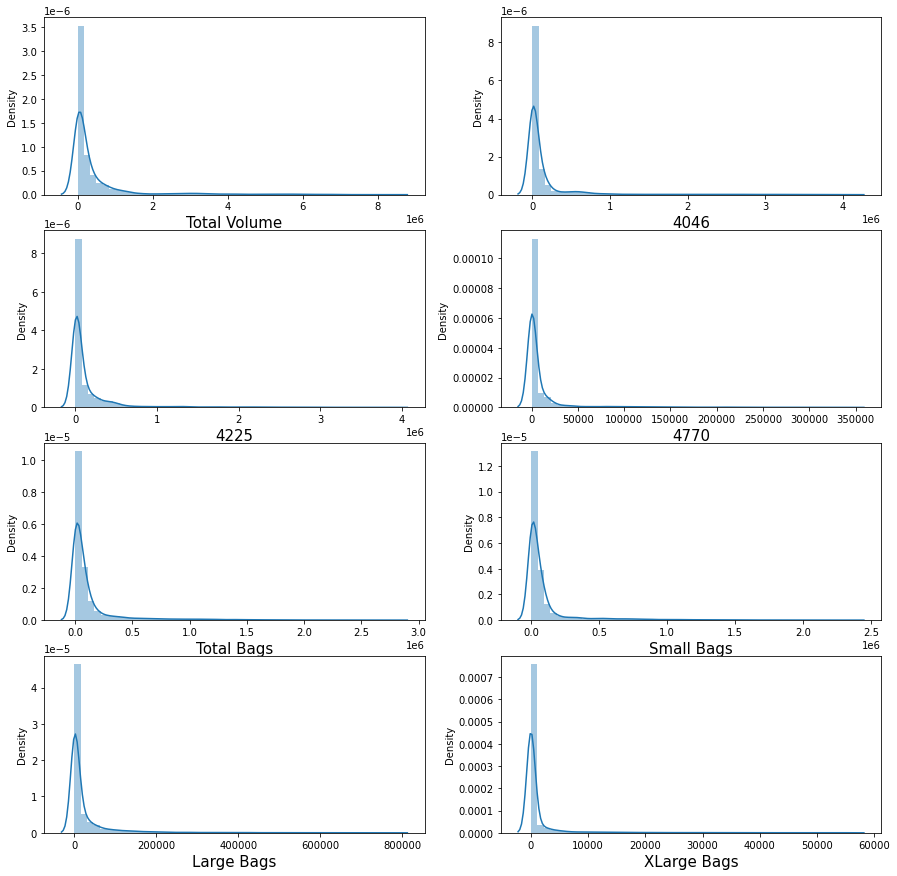

In [112]:
# Checking skewness through data visualization
#when "AveragePrice" is Target Column
collist=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']
plt.figure(figsize=(15,15))
plotnumber = 1
for column in df1[collist]:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [113]:
# We can see skewness is present in the columns

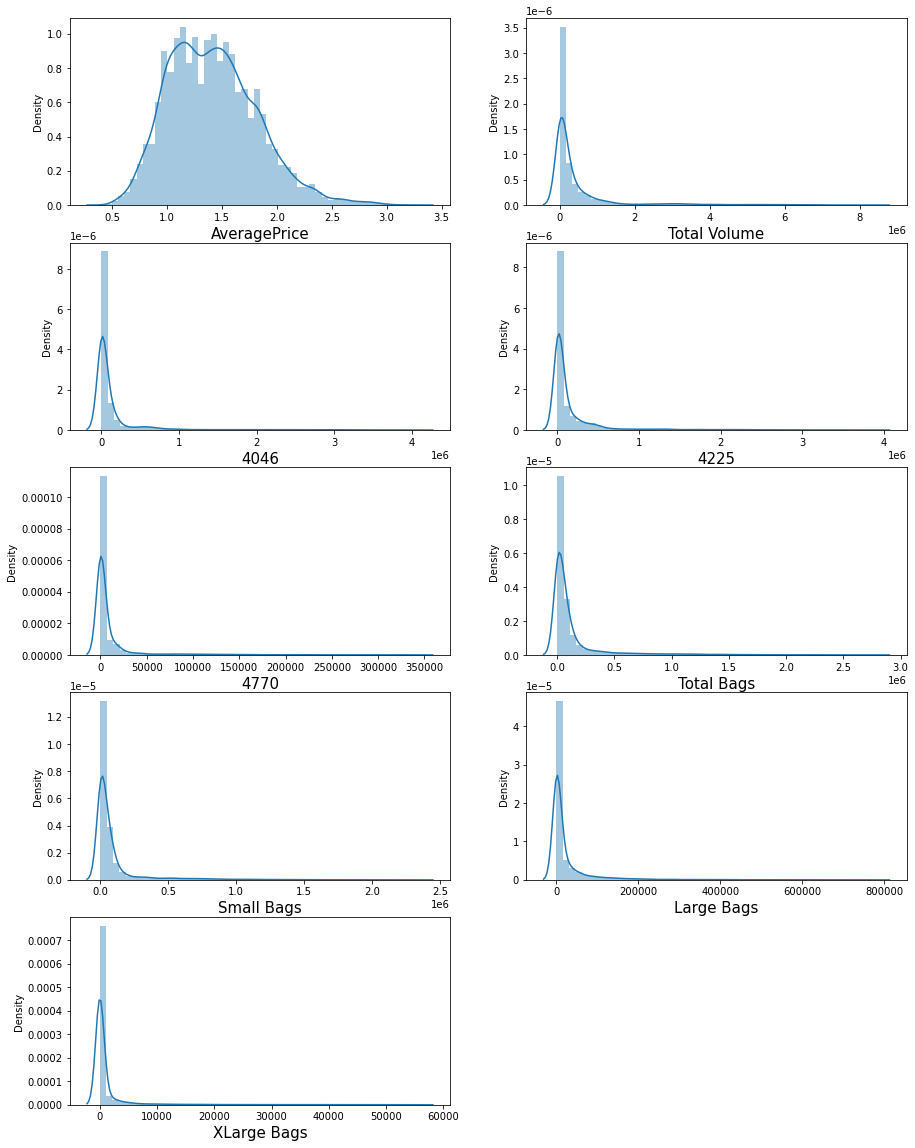

In [114]:
#when "region" is Target Column
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,20))
plotnumber = 1

for column in df_study[collist]:
    if plotnumber<=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df_study[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [115]:
# We can see skewness is present in all columns

In [116]:
# Removing skewness using yeo-johnson method
#Target column is "AveragePrice"
collist=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']
df1[collist]=power_transform(df1[collist],method='yeo-johnson')
df1[collist]

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
18244     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
18245     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
18246     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
18247     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
18248     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags  
0       -0.775214    -0.675702  
1       -0.765237    -0.675702  
2       -0.752534    -0.675702  
3       -0.693012    -0.675702  
4       -0.600755    -0.675702  
...           ...          ...  
18244   -0.405895    -0.675702  
18245   -0.478556    -0.675702  
18246   -0.945246    -0.675702  
18247   -0.910471    -0.675702  
18248   -1.042930    -0.675702  

[17782 rows x 8 columns]

In [117]:
#Target column is "region"
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

df_study[collist]=power_transform(df1[collist],method='yeo-johnson')
df_study[collist]

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.116108     -0.075636 -0.653168  0.348247 -0.211458   -0.534226   
1         -0.063731     -0.147608 -0.772216  0.265547 -0.163999   -0.495440   
2         -1.300650      0.205534 -0.727091  0.650156  0.035375   -0.562635   
3         -0.822900      0.019251 -0.628477  0.466989 -0.109835   -0.706795   
4         -0.249571     -0.180657 -0.680097  0.258097 -0.099145   -0.680530   
...             ...           ...       ...       ...       ...         ...   
18244      0.615242     -0.674146 -0.458796 -0.923266 -1.225582   -0.339795   
18245      0.792624     -0.766138 -0.613983 -0.671633 -1.225582   -0.506657   
18246      1.128329     -0.770037 -0.613931 -0.778430  0.456238   -0.500600   
18247      1.248180     -0.697455 -0.543343 -0.716793  0.455928   -0.432385   
18248      0.592591     -0.663437 -0.356812 -0.790999  0.169130   -0.391976   

       Small Bags  Large Bags  XLarge Bags  
0       -0.345468   -0.789832    -0.688181  
1       -0.309714   -0.780450    -0.688181  
2       -0.372226   -0.768495    -0.688181  
3       -0.507188   -0.712352    -0.688181  
4       -0.486987   -0.624897    -0.688181  
...           ...         ...          ...  
18244   -0.175213   -0.438299    -0.688181  
18245   -0.330168   -0.508192    -0.688181  
18246   -0.312125   -0.948869    -0.688181  
18247   -0.249325   -0.916472    -0.688181  
18248   -0.210968   -1.039535    -0.688181  

[17782 rows x 9 columns]

In [118]:
df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [119]:
df_study.skew()

AveragePrice    0.004164
Total Volume    0.023040
4046           -0.015818
4225            0.004294
4770            0.026169
Total Bags      0.020499
Small Bags      0.019905
Large Bags      0.015587
XLarge Bags     0.774360
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [120]:
# We can see skewness is removed

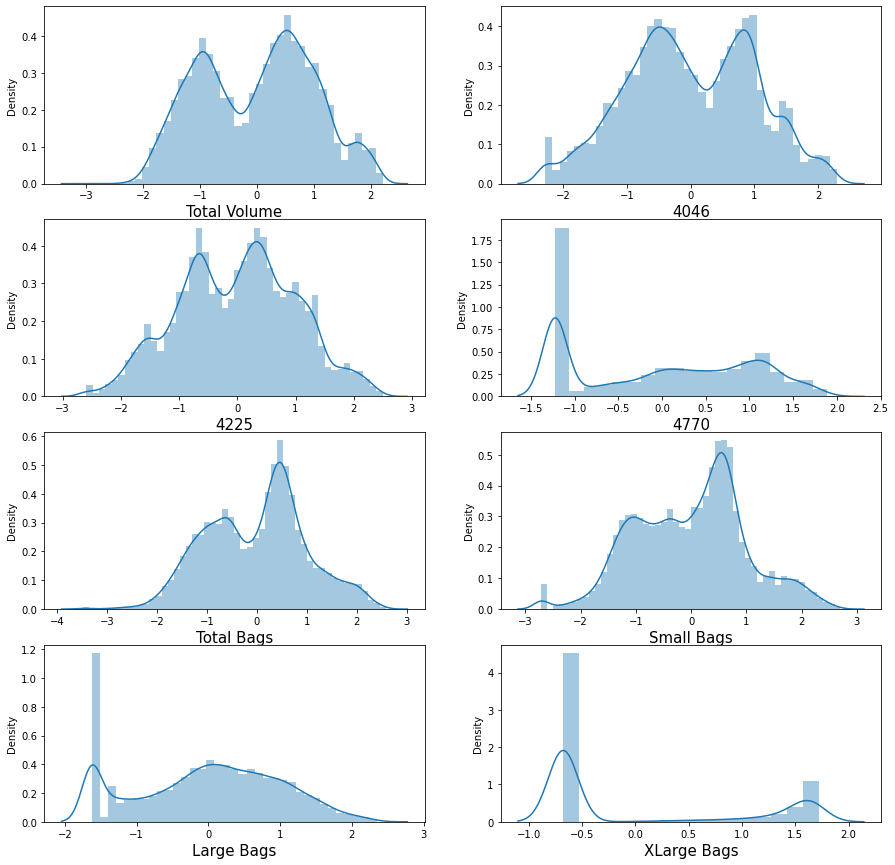

In [121]:
#  Checking skewness through data visualization again after removal
#target variable is "AveragePrice"
collist=['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']
plt.figure(figsize=(15,15))
plotnumber = 1
for column in df1[collist]:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

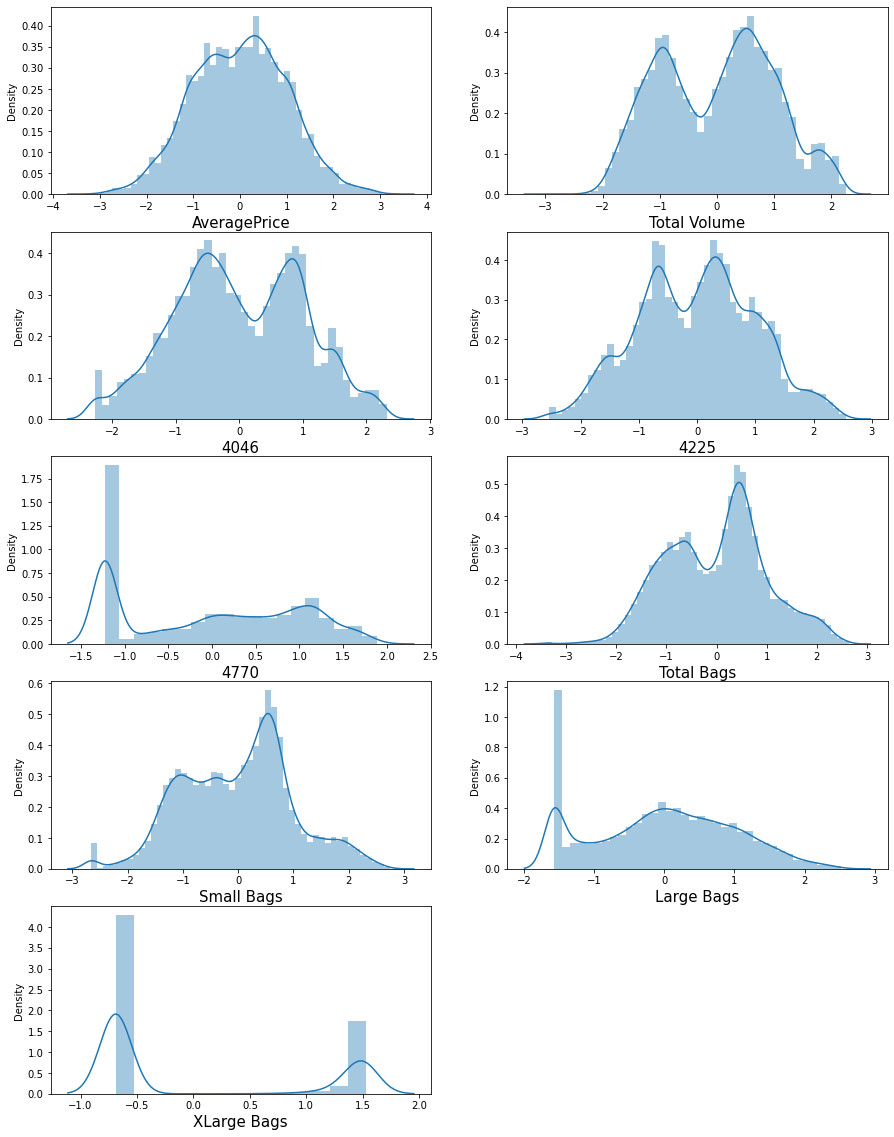

In [122]:
#when "region" is Target Column
collist=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' , 'XLarge Bags']

plt.figure(figsize=(15,20))
plotnumber = 1

for column in df_study[collist]:
    if plotnumber<=9:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df_study[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

In [123]:
# Data preprocessing
# Spliting data into Target and Features:
# Target Variable is AveragePrice
x=df1.drop("AveragePrice",axis=1)
y=df1["AveragePrice"]

In [124]:
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  type  year  region  
0   -0.775214    -0.675702     0  2015       0  
1   -0.765237    -0.675702     0  2015       0  
2   -0.752534    -0.675702     0  2015       0  
3   -0.693012    -0.675702     0  2015       0  
4   -0.600755    -0.675702     0  2015       0

In [125]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [126]:
x.shape, y.shape

((17782, 11), (17782,))

In [128]:
# Target Variable is region
x1=df1.drop("region",axis=1)
y1=df1["region"]

In [129]:
x1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  
0   -0.337064   -0.775214    -0.675702     0  2015  
1   -0.301038   -0.765237    -0.675702     0  2015  
2   -0.364044   -0.752534    -0.675702     0  2015  
3   -0.500341   -0.693012    -0.675702     0  2015  
4   -0.479918   -0.600755    -0.675702     0  2015

In [130]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [131]:
x1.shape, y1.shape

((17782, 11), (17782,))

In [132]:
#  Variance Threshold Method
#  It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [133]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [134]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [135]:
# Target Variable is AveragePrice
x.columns[var_threshold.get_support()]

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [136]:
x.shape

(17782, 11)

In [137]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [138]:
# Target Variable is region
x1.columns[var_threshold.get_support()]

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'],
      dtype='object')

In [139]:
x1.shape

(17782, 11)

In [140]:
# taking  out  all the  constant  columns 
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

In [141]:
best_fit = SelectKBest(score_func = f_classif, k =11)
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [142]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

         Feature      Score
8           type  49.966168
0   Total Volume  39.927250
1           4046  36.480181
4     Total Bags  35.879124
3           4770  27.651101
5     Small Bags  25.039951
6     Large Bags  23.354747
2           4225  21.772853
7    XLarge Bags  15.065353
9           year   3.163539
10        region   1.291093


In [143]:
x = x.drop([ "region"],axis=1)

In [144]:
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
18244     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
18245     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
18246     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
18247     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
18248     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags  type  year  
0       -0.775214    -0.675702     0  2015  
1       -0.765237    -0.675702     0  2015  
2       -0.752534    -0.675702     0  2015  
3       -0.693012    -0.675702     0  2015  
4       -0.600755    -0.675702     0  2015  
...           ...          ...   ...   ...  
18244   -0.405895    -0.675702     1  2018  
18245   -0.478556    -0.675702     1  2018  
18246   -0.945246    -0.675702     1  2018  
18247   -0.910471    -0.675702     1  2018  
18248   -1.042930    -0.675702     1  2018  

[17782 rows x 10 columns]

In [145]:
#Target Variable is region
best_fit1 = SelectKBest(score_func = f_classif, k =11)
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

         Feature       Score
2           4046  180.309702
7     Large Bags  159.457692
3           4225  142.620675
5     Total Bags  131.076425
6     Small Bags  128.822420
1   Total Volume  118.194755
4           4770   83.840618
0   AveragePrice   66.630123
8    XLarge Bags   27.397082
9           type    4.159580
10          year    0.378935


Selecting the best features based on above scores, we can see that the column "year" has most lowest features for the prediction, so we will drop this column.



In [146]:
x1 = x1.drop([ "year"],axis=1)
x1

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  type  
0       -0.337064   -0.775214    -0.675702     0  
1       -0.301038   -0.765237    -0.675702     0  
2       -0.364044   -0.752534    -0.675702     0  
3       -0.500341   -0.693012    -0.675702     0  
4       -0.479918   -0.600755    -0.675702     0  
...           ...         ...          ...   ...  
18244   -0.165765   -0.405895    -0.675702     1  
18245   -0.321645   -0.478556    -0.675702     1  
18246   -0.303466   -0.945246    -0.675702     1  
18247   -0.240252   -0.910471    -0.675702     1  
18248   -0.201685   -1.042930    -0.675702     1  

[17782 rows x 10 columns]

In [147]:
#Checking for Multicolinearity
#VIF (Variance Inflation factor)
#Target Variable is AveragePrice

In [148]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values      Features
0   51.668269  Total Volume
1    6.728047          4046
2   11.114028          4225
3    3.786217          4770
4   33.798364    Total Bags
5   16.570740    Small Bags
6    3.437234    Large Bags
7    1.965192   XLarge Bags
8    7.531878          type
9    4.864297          year

The VIF value is more than 10 in the columns 'Total Volume', '4225', 'Total Bags' and 'Small Bags'. But column 'Total Volume' is having highest VIF value. So, we will drop column 'Total Volume'.

In [149]:
x.drop('Total Volume', axis =1, inplace=True)

In [150]:
# Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values     Features
0    3.411924         4046
1    4.155664         4225
2    3.775437         4770
3   24.044284   Total Bags
4   16.570218   Small Bags
5    3.391418   Large Bags
6    1.949446  XLarge Bags
7    7.050966         type
8    4.617580         year

Here we can see that Multicolinearity is still present in the columns. So, we will again drop highest VIF value column which is 'Total Bags' for removing Multicolinearity.

In [151]:
x.drop('Total Bags', axis =1, inplace=True)

In [152]:
# Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values     Features
0    3.403686         4046
1    4.041277         4225
2    3.770623         4770
3    3.559855   Small Bags
4    1.749704   Large Bags
5    1.949136  XLarge Bags
6    7.047209         type
7    4.615647         year

Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

In [153]:
# Target Variable is region
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

VIF values      Features
0    5.619090  AveragePrice
1   49.820291  Total Volume
2    6.722687          4046
3   11.037281          4225
4    3.714371          4770
5   34.160354    Total Bags
6   16.744872    Small Bags
7    3.440905    Large Bags
8    1.969717   XLarge Bags
9    8.425873          type

The VIF value is more than 10 in the columns 'Total Volume', '4225', 'Total Bags' and 'Small Bags'. But column 'Total Volume' is having highest VIF value. So, we will drop column 'Total Volume'.

In [154]:
x1.drop('Total Volume', axis =1, inplace=True)

In [155]:
# Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

VIF values      Features
0    5.531946  AveragePrice
1    3.341500          4046
2    4.290236          4225
3    3.712837          4770
4   24.250715    Total Bags
5   16.740961    Small Bags
6    3.392263    Large Bags
7    1.962026   XLarge Bags
8    8.203285          type

Here we can see that Multicolinearity is still present in the columns. So, we will again drop highest VIF value column which is 'Total Bags' for removing Multicolinearity.

In [156]:
x1.drop('Total Bags', axis =1, inplace=True)

In [157]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

VIF values      Features
0    5.482561  AveragePrice
1    3.329579          4046
2    4.140533          4225
3    3.712681          4770
4    3.549038    Small Bags
5    1.796646    Large Bags
6    1.958225   XLarge Bags
7    8.149936          type

In [159]:
# Now, we can see The VIF value is less than 10 in all columns in both type. So, we will create model now.

In [160]:
#Creating Model
# Finding the best random state among all the models¶


In [161]:
# for Regression model
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8314626113717274 on random_state: 72


In [162]:
# At random state 72, we are getting best accuracy score i.e., 83%

# Creating train-test-split

In [163]:
#For regression model
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
x.shape, y.shape

((17782, 8), (17782,))

In [164]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 8), (12447,), (5335, 8), (5335,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. 
We have to check this dataset through both model building, regression and classification. First, we are using regression model then classification.

In [165]:
# 1. Regression Model Building
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)
#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.46820338745534806
Mean abs error:  0.22586476376443057
Mean squared error:  0.08552850511024795
Root Mean Squared Error:  0.29245256899238886


R2 score for Linear Regression is 46%


Checking the performance of the model by graph

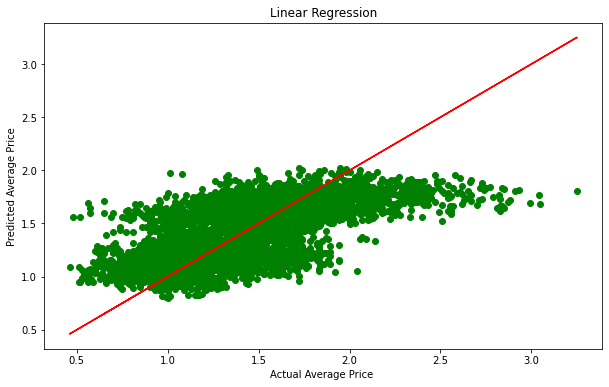

In [174]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Linear Regression")
plt.show()

In [175]:
#Random forest Regression Model
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8207355926473898
Mean abs error:  0.11827420493595767
Mean squared error:  0.02883097864610022
Root Mean Squared Error:  0.16979687466529006


In [176]:
#  R2 score for Random forest Regression is 82%

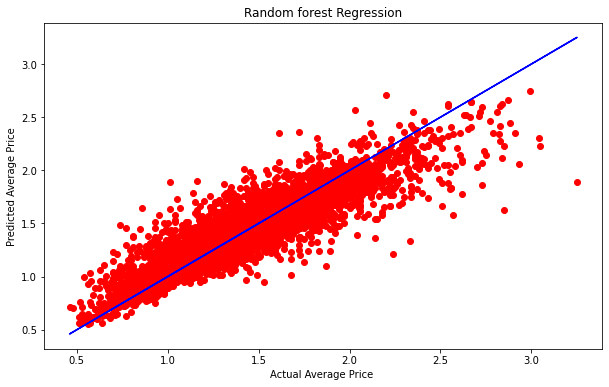

In [177]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Random forest Regression")
plt.show()

In [178]:
# KNN regressor
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7722754284929972
Mean abs error:  0.13485952306570861
Mean squared error:  0.03662479549214944
Root Mean Squared Error:  0.1913760577819217


In [179]:
# R2 score for KNN regressor is 77%

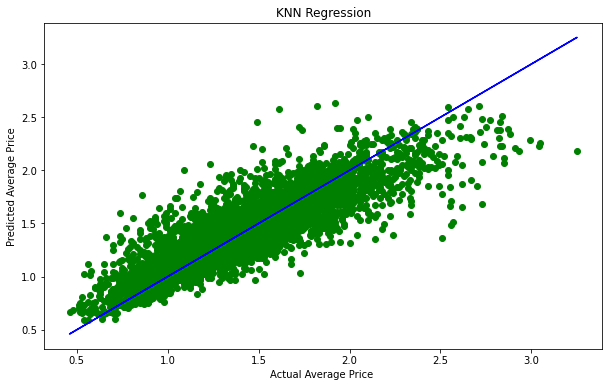

In [183]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("KNN Regression")
plt.show()

In [184]:
# Gradient Boosting Regressor
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)
#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7106509133170524
Mean abs error:  0.1597744354968962
Mean squared error:  0.04653582639534045
Root Mean Squared Error:  0.2157216409990904


In [185]:
#  R2 score for Gradient Boosting Regressor is 71%

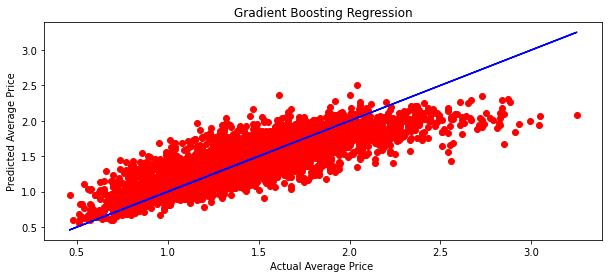

In [187]:
# Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Gradient Boosting Regression")
plt.show()

In [189]:
# Ridge Regressor
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0, 'solver': 'sag'}


In [190]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.46824217985227057
Mean abs error:  0.22581212583741142
Mean squared error:  0.08552226615415053
Root Mean Squared Error:  0.29244190218597355


In [191]:
# R2 score for Ridge regressor is 46%

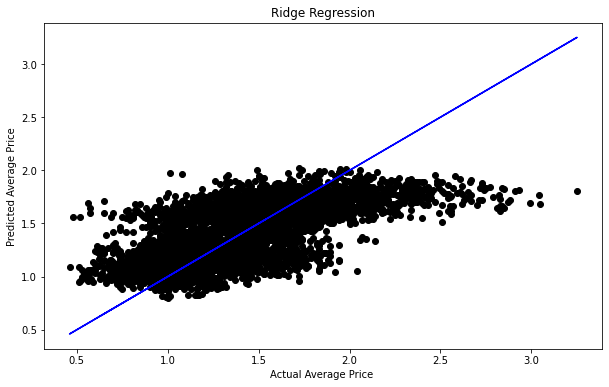

In [196]:
# Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='k')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Average Price ")
plt.ylabel("Predicted Average Price")
plt.title("Ridge Regression")
plt.show()

Checking Cross Validation Score of Models
Checking CV score for Linear Regression

In [197]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x,y,cv=5).mean())

The CV score  for Linear_regression is : 0.06027703883344464


In [198]:
#Checking CV score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

The CV  score for  the Random forest regressor is: 0.27730224588582775


In [199]:
#  Checking CV score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

The CV score  for  the KNN regressor is : 0.06220788143289739


In [200]:
#  Checking CV score for GBR Regression
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x,y,cv=5).mean())

The CV score  for  the GBR regressor is : 0.34688613837153603


In [201]:
#  Checking CV score for Ridge Regression
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x,y,cv=5).mean())

The CV score  for  the Ridge regressor is : 0.0601383016262637


In [202]:
#Hyper Parameter Tuning
#The Random Forest Regressor with GridsearchCV

parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [203]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [204]:
# Creating Final Regressor Model
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [205]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

82.07355926473898


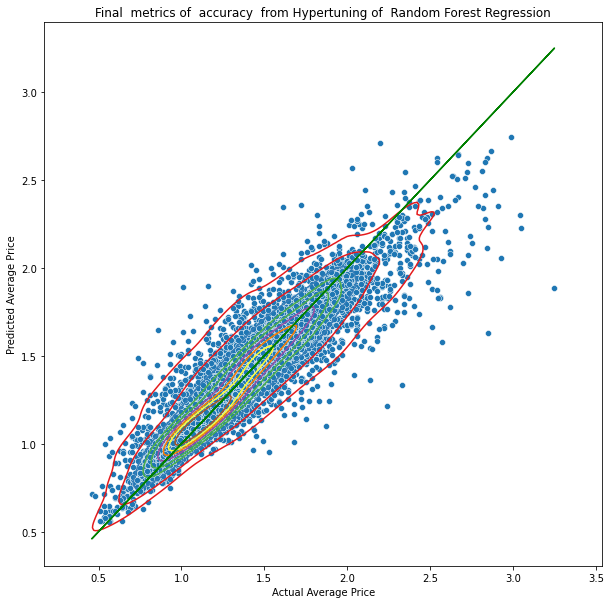

In [207]:
#So, after the Hypertuning now we got a accuracy score of 82% on Random Forest Regression

#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Average Price")
plt.ylabel("Predicted Average Price")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

In [208]:
# Saving The Predictive Regressor Model
#saving the model at local file system
filename='Avacado_Regressor_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)


array([1.15681951, 1.14628164, 1.35057548, ..., 1.67013515, 1.57901987,
       0.7097826 ])

In [209]:
# Adjusted R2 score
lr.score(x_train,y_train)

0.46930171597120096

In [210]:
# Let's check how well model fits the test data
lr.score(x_test,y_test)

0.46820338745534806

In [211]:
# Prediction of Regressor Model
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Avacado_Regressor = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Avacado_Regressor

Original  Predicted
0         1.54   1.156820
1         1.08   1.146282
2         1.15   1.350575
3         1.45   1.634974
4         2.34   2.367107
...        ...        ...
5330      1.59   1.836487
5331      1.83   1.694964
5332      1.35   1.670135
5333      1.70   1.579020
5334      0.63   0.709783

[5335 rows x 2 columns]

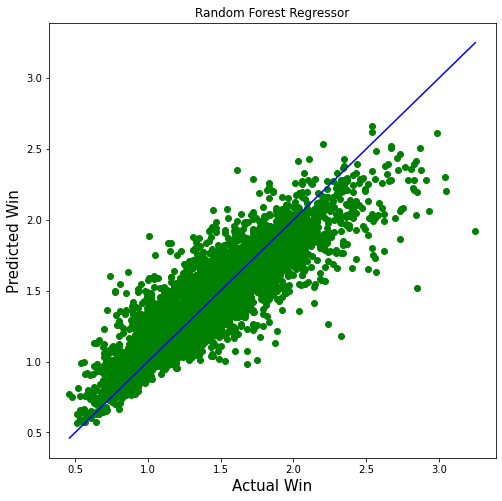

In [213]:
# Let's plot and visualize
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='g')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Random Forest Regressor")
plt.show()

In [214]:
# 2. Classification Model Building
#For Target Column region¶

In [215]:
# Finding the best random state among all the models
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7941893158388004  on Random_state  71


In [216]:
# At random state 71, Best accuracy is 79%

In [217]:
#Creating train-test-split
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12447, 8), (12447,), (5335, 8), (5335,))

In [218]:
x.shape, y.shape

((17782, 8), (17782,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. As it is a continuous data , so we have to understand this by Classification problem

In [219]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7955014058106842
confusion_matrix: 
 [[88  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  1]
 [ 0  0 90 ...  0  0  1]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  1  2 ...  0  0 66]]
classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       112
           1       0.74      0.68      0.71       107
           2       0.91      0.87      0.89       103
           3       0.83      0.81      0.82       106
           4       0.79      0.87      0.83       104
           5       0.73      0.66      0.70       110
           6       0.96      0.93      0.94        99
           7       0.84      0.78      0.81       104
           8       0.92      0.94      0.93       107
           9       0.86      0.82      0.84       113
          10       0.72      0.70      0.71        97
          11       0.81      0.85      0.83       112
          12       0.84      0.80      0.82        97
      

In [220]:
# Accuracy Score for Decision Tree Classifier is 79%

In [221]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8967197750702905
confusion_matrix: 
 [[100   0   0 ...   0   0   0]
 [  0  91   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  70   0]
 [  0   0   1 ...   0   0  84]]
classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.90      0.85      0.88       107
           2       0.96      0.96      0.96       103
           3       0.93      0.83      0.88       106
           4       0.92      0.92      0.92       104
           5       0.90      0.83      0.86       110
           6       0.99      0.98      0.98        99
           7       0.89      0.89      0.89       104
           8       1.00      0.98      0.99       107
           9       0.91      0.91      0.91       113
          10       0.93      0.90      0.91        97
          11       0.91      0.97      0.94       112
          12       0.94 

In [222]:
#Accuracy Score for Random Forest Classifier is 89%

In [224]:
# Support Vector Machine Classifier
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

0.6513589503280225
[[89  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 84 ...  0  0  2]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  3  0 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       112
           1       0.36      0.66      0.47       107
           2       0.80      0.82      0.81       103
           3       0.66      0.68      0.67       106
           4       0.63      0.71      0.67       104
           5       0.64      0.55      0.59       110
           6       0.92      0.93      0.92        99
           7       0.64      0.60      0.62       104
           8       0.79      0.80      0.80       107
           9       0.73      0.85      0.78       113
          10       0.57      0.53      0.55        97
          11       0.63      0.73      0.67       112
          12       0.63      0.64      0.64        97
          13       0.56      0.64      0.60        95
          14  

In [225]:
# Accuracy Score for Support Vector Machine Classifier is 65%

In [226]:
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test,pred_knn))

0.8596063730084349
[[102   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  68   0]
 [  0   0   0 ...   0   0  72]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       112
           1       0.78      0.86      0.82       107
           2       0.93      0.89      0.91       103
           3       0.85      0.79      0.82       106
           4       0.87      0.88      0.87       104
           5       0.79      0.74      0.76       110
           6       0.97      0.98      0.97        99
           7       0.83      0.88      0.85       104
           8       0.96      0.94      0.95       107
           9       0.83      0.87      0.85       113
          10       0.81      0.84      0.82        97
          11       0.87      0.98      0.92       112
          12       0.95      0.90      0.92        97
          13       0.76      0.7

In [227]:
# Accuracy Score for KNN Classifier is 86%

In [228]:
# Cross Validation Score for all the model
# CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x1,y1,cv=5).mean())

CV score for Decision Tree Classifier:  0.5512846703833092


In [229]:
# CV Score for Random Forest Classifier
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x1,y1,cv=9).mean())

CV score for Random forest Classifier:  0.7623369890158698


In [230]:
# CV Score for Support Vector Classifier
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x1,y1,cv=9).mean())

CV score for Support Vector  Classifier:  0.557298581572399


In [231]:
# CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x1,y1,cv=9).mean())

CV score for KNN Classifier:  0.7094762466048274


In [232]:
# Hyper parameter tuning for best model using GridsearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [233]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = 42)

In [234]:
rfc=RandomForestClassifier(random_state=42)

In [238]:
param_grid = {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [239]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [240]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [241]:
ava_region = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
ava_region.fit(x_train, y_train)
pred = ava_region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

71.56513589503281


In [243]:
# calculating the scores 
score = cross_val_score(rfc,x1,y1,cv=100,scoring="accuracy").mean()
print("Cross Validation Score: ", score*100)
print("Mean Score :", score.mean()*100)
print("STD Score:", score.std())

Cross Validation Score:  87.79730844918429
Mean Score : 87.79730844918429
STD Score: 0.0


In [244]:
# ROC-AUC Curve
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)


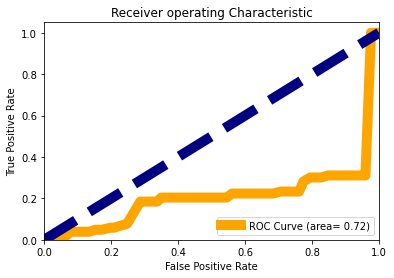

In [245]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.72.

Accuracy Score is 71%, Cross Validation Score: 87.79730844918429, Mean Score : 87.79730844918429 and STD Score: 0.0

In [246]:
# Saving the Classification Model
filename='Avacado_region.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model2 = pickle.load(open(filename, 'rb'))
loaded_model2.predict(x_test)

array([31, 14, 30, ..., 15, 46, 19])

In [247]:
# Checking predicted and original values
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Avacado_regions=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Avacado_regions

Orginal  Predicted
0          31         31
1          14         14
2          16         30
3          22         22
4          47         39
...       ...        ...
5330        0          0
5331        0          0
5332       15         15
5333       46         46
5334       19         19

[5335 rows x 2 columns]

As we can see, predicted and original values matches approx 100%.

Conclusion:
Using Target Variable "AveragePrice", we get Accuracy score 82% and
Using Target Variable "region", we get Accuracy score 71%
On the basis of Target Variable "AveragePrice" is giving better accuracy compare to Target Variable "region"